In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import pickle

In [241]:
df = pd.read_excel("Статистика_для_графиков_3_д_ТЭЦ2_УРУТ_130.xlsx")

In [242]:
df = df.drop(['Unnamed: 4', 'Дата', 'Предсказание полином 2'], axis=1)

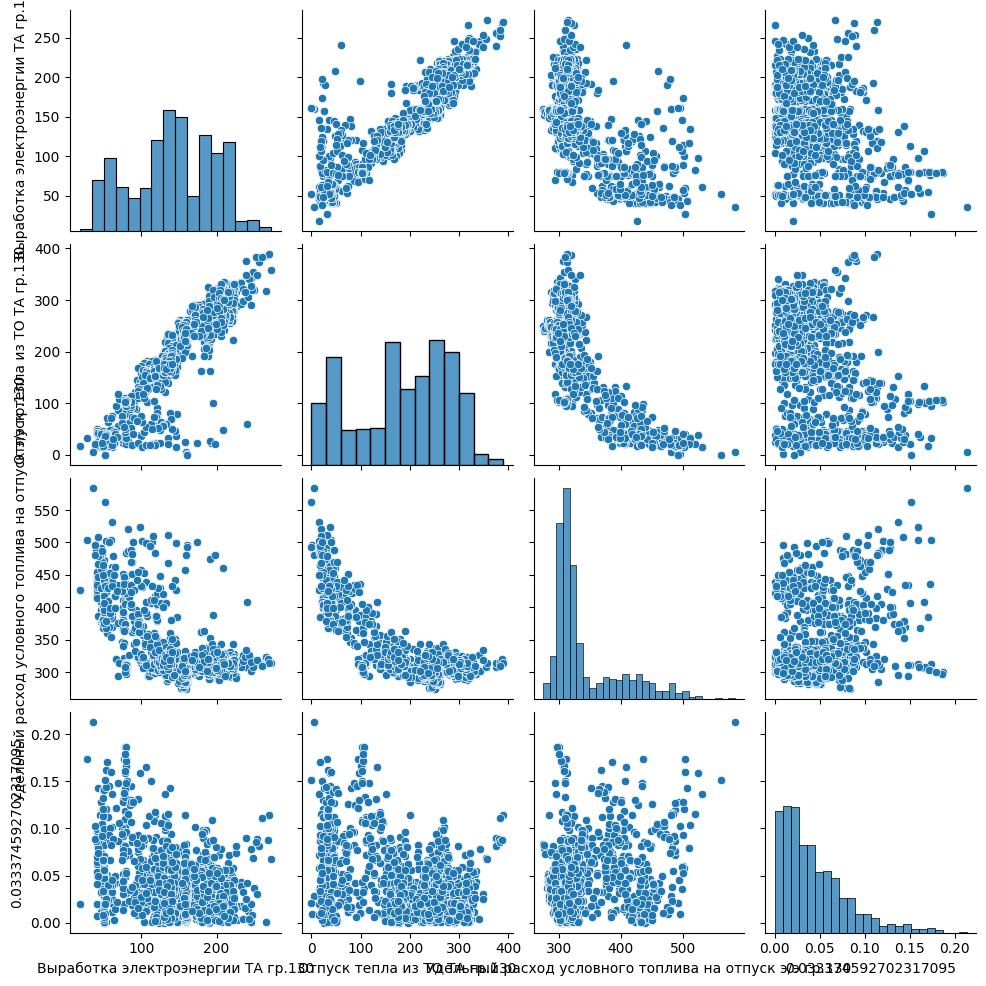

In [243]:
sns.pairplot(df)

In [244]:
x = df[['Выработка электроэнергии ТА гр.130', 'Отпуск тепла из ТО ТА гр.130']]
y = df['Удельный расход условного топлива на отпуск э/э гр.130']

In [245]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

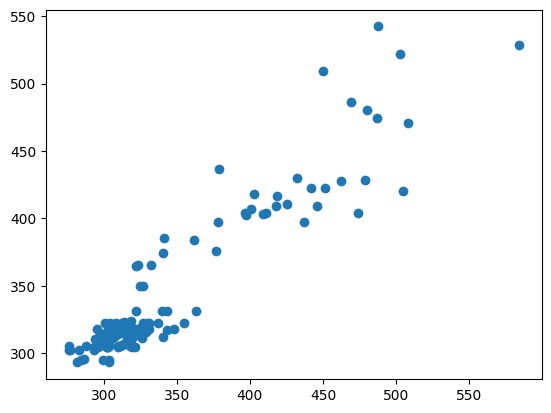

In [246]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)

In [247]:
train_score = model.score(x_test, y_test)
print("The training score of model is: ", train_score)

The training score of model is:  0.8773125756112734


In [248]:
print(f"Средне квадратичное ошибки {np.sqrt(metrics.mean_squared_error(y_test, predictions))}")

Средне квадратичное ошибки 19.530054428550997


In [249]:
filename = 'linear_model.bf'
pickle.dump(model, open(filename, 'wb'))